In [2]:
import pydataset

In [3]:
df= pydataset.data("iris")

In [4]:
# ! pip install -U scikit-learn scipy matplotlib

In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense

In [6]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(df['Species'])

In [8]:
df['Species'] = labels


In [9]:
X = df[["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]]
y = df[['Species']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

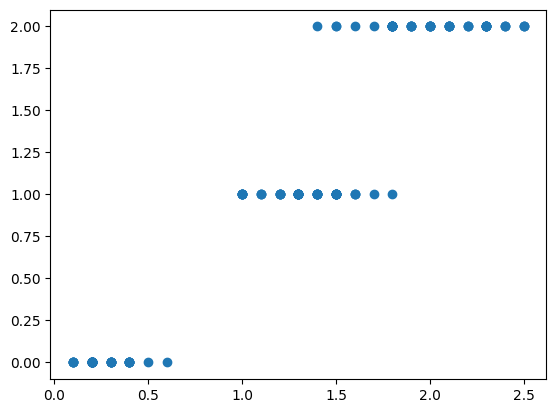

In [10]:
plt.scatter(df['Petal.Width'], df['Species'])

plt.show()

In [11]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
knnModel.score(x_test, y_test)

0.9666666666666667

## 1.RELU

In [13]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import Dropout
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid

In [14]:
from tensorflow.keras.layers import BatchNormalization
#CREATING THE ANN AS SEQUENCE OF LAYERS
ann = Sequential()

#ADD FIRST HIDDEN LAYER WITH 30 NEURONS, THE INPUT LAYERS WILL BE ADDED AUTOAMTICALLY,
ann.add(Dense(units = 30,activation = 'relu'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))


#ADDING OUTPUT LAYER WITH 1 NEURON, AS THIS IS BINARY CLASSIFICATION
ann.add(Dense(units = 1,activation = 'sigmoid'))

In [15]:
#now testing for test data

y_pred = ann.predict(x_test)

#converting values
y_pred = (y_pred>0.5)

1/1 [==============================] - 0s 355ms/step


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)
score1 = accuracy_score(y_test,y_pred)
print(cm)
print("score is",score1)

[[ 0  7  0]
 [ 0 11  0]
 [ 0 12  0]]
score is 0.36666666666666664


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.37      1.00      0.54        11
           2       0.00      0.00      0.00        12

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

<AxesSubplot: >

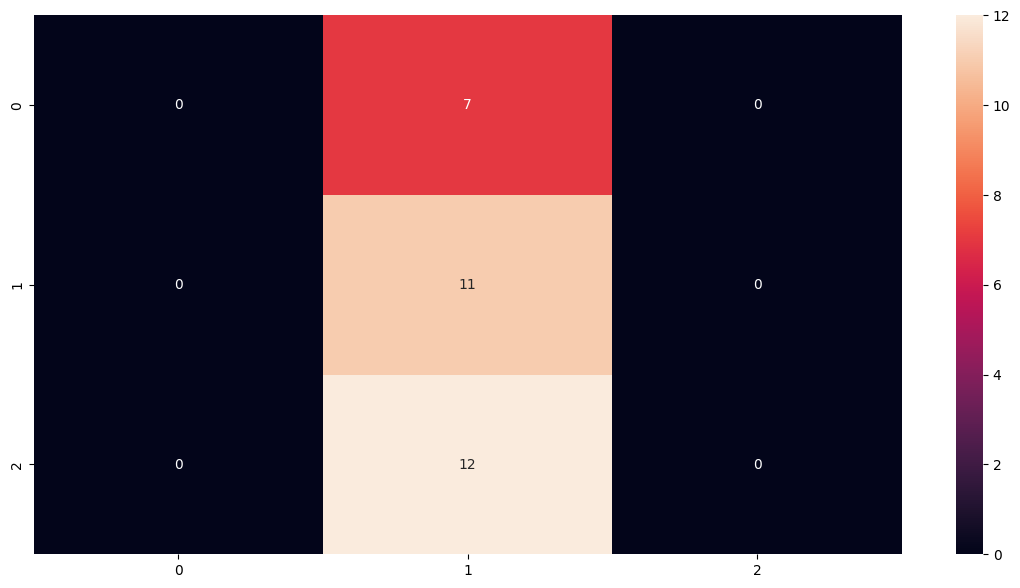

In [18]:
# creating heatmap of confusion matrix 
import seaborn as sns
plt.figure(figsize=[14,7])
sns.heatmap(cm,annot = True)

In [19]:
from tensorflow.keras.layers import BatchNormalization

# creating the ann as sequence of layers

ann = Sequential()

#adding first hidden layer with 30 neurons,the input layer will be added automatically

ann.add(Dense(units=30,activation='softmax'))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))

# adding output layer with 1 neuron, as this a binary classification

ann.add(Dense(units=1,activation='sigmoid'))

In [20]:
#compiling the ann using stochastic gradient descent (optimizer - adam)

ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#setting callback for monitoring maximum accuracy

from tabnanny import verbose
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode = 'min',verbose=1,patience=25)

#traiining the ann with batch size of 32 (this is a batch learning)

model = ann.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test),epochs=500,callbacks=[early_stop])

Epoch 1/500
4/4 [==============================] - 1s 77ms/step - loss: 0.5823 - accuracy: 0.4250 - val_loss: 0.6696 - val_accuracy: 0.3667
Epoch 2/500
4/4 [==============================] - 0s 15ms/step - loss: 0.5293 - accuracy: 0.5167 - val_loss: 0.6455 - val_accuracy: 0.3667
Epoch 3/500
4/4 [==============================] - 0s 12ms/step - loss: 0.4387 - accuracy: 0.5083 - val_loss: 0.6214 - val_accuracy: 0.3667
Epoch 4/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3801 - accuracy: 0.5750 - val_loss: 0.5971 - val_accuracy: 0.3667
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 0.3048 - accuracy: 0.6167 - val_loss: 0.5739 - val_accuracy: 0.3667
Epoch 6/500
4/4 [==============================] - 0s 14ms/step - loss: 0.2410 - accuracy: 0.6083 - val_loss: 0.5506 - val_accuracy: 0.3667
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 0.0999 - accuracy: 0.6167 - val_loss: 0.5273 - val_accuracy: 0.3667
Epoch 8/500
4/4 [===